# Programa Ingenias+ Data Science

## Objetivo del notebook

El objetivo de este notebook es aplicar y comparar técnicas de aprendizaje no supervisado, tanto de clustering como de reducción de dimensionalidad, para identificar patrones y estructuras subyacentes en los datos.

Las columnas de características que se utilizarán en el notebook se detallan a continuación.


## Importación de archivos y librerías

In [14]:
# Imports de librerías y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from utils.codificaciones import *
from utils.funcions import *

In [4]:
# Importar el csv
friesgo_raw = pd.read_csv('datasets/friesgo.csv')

## Preprocesado

### Identificación de variables

In [15]:
# Separar variables categóricas y numéricas
variables_categoricas = ['cod_provincia','tamanio_aglomerado','sexo','condicion_actividad','ansiedad_depresion'
                           ,'nivel_actividad_fisica','condicion_fumador','consumo_sal'
                           ,'colesterol_alto','freq_cons_alc','es_diabetico','mantiene_ha_alta']
variables_numericas = ['edad','media_fv_diaria','imc_numerico']

In [6]:
# Selección de columnas
friesgo = friesgo_raw[['cod_provincia','tamanio_aglomerado','sexo','condicion_actividad','ansiedad_depresion',
           'nivel_actividad_fisica','condicion_fumador','consumo_sal','colesterol_alto',
           'freq_cons_alc','es_diabetico','mantiene_ha_alta', 'edad','media_fv_diaria',
           'imc_numerico']]

In [7]:
# Copiar el dataframe
friesgo_cod = friesgo.copy()

### Evaluación y procesamiento de nulos

In [10]:
calcular_nulos_y_porcentaje(friesgo_cod)

,Nulos,Porcentaje
cod_provincia,0,0.0%
tamanio_aglomerado,0,0.0%
sexo,0,0.0%
condicion_actividad,0,0.0%
ansiedad_depresion,0,0.0%
nivel_actividad_fisica,226,0.84%
condicion_fumador,0,0.0%
consumo_sal,0,0.0%
colesterol_alto,0,0.0%
freq_cons_alc,0,0.0%


In [11]:
# Eliminación de nulos
friesgo_cod = friesgo_cod.dropna()

In [12]:
calcular_nulos_y_porcentaje(friesgo_cod)

,Nulos,Porcentaje
cod_provincia,0,0.0%
tamanio_aglomerado,0,0.0%
sexo,0,0.0%
condicion_actividad,0,0.0%
ansiedad_depresion,0,0.0%
nivel_actividad_fisica,0,0.0%
condicion_fumador,0,0.0%
consumo_sal,0,0.0%
colesterol_alto,0,0.0%
freq_cons_alc,0,0.0%


### Codificación de columnas

In [13]:
# Visualización de filas y columnas
friesgo_cod.shape

(25539, 15)

In [16]:
# Codificación de columnas
le = LabelEncoder()
for columnas in variables_categoricas:
    friesgo_cod[columnas] = le.fit_transform(friesgo_cod[columnas])

In [17]:
# Evaluar que no haya pérdida de filas y/o columnas por la codificación
friesgo_cod.shape

(25539, 15)

## Reduccion de dimensionalidad

### Metodo Manual : Permutation importance

Se aplicara un algoritmo de clasificacion Random forest para sobre este poder medir la importancia de las caracteristicas/features/columnas del dataset para decidir cuales son las mas importantes para posteriormente realizar una reduccion de dimensionalidad eliminando las columnas cuyas importancias esten representadas por porcentajes bajos.

### Estandarizar datos

PCA es sensible a la escala de las columnas. La estandarización asegura que cada característica contribuya igualmente al análisis.

In [ ]:
# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(friesgo_cod)

### Evaluar el número óptimo de componentes para PCA

Para conservar el 95% de información al aplicar PCA, hay que seleccionar el número de componentes principales que en conjunto expliquen al menos el 95% de la varianza total.

In [ ]:
pca = PCA(n_components = 0.95)
pca_data = pca.fit_transform(scaled_data)
n_components = pca.n_components_

# Ver el número de componentes seleccionados automáticamente
print(f"Número de componentes seleccionados: {n_components}")

Número de componentes seleccionados: 14


### Aplicar PCA 

Para conservar el 95% de información al aplicar PCA, hay que seleccionar el número de componentes principales que en conjunto expliquen al menos el 95% de la varianza total.

In [ ]:
# Aplicar PCA con el número óptimo de componentes
pca_opt = PCA(n_components = n_components)
pca_opt_data = pca_opt.fit_transform(scaled_data)

# Convertir a DataFrame para facilitar el manejo
pca_df = pd.DataFrame(data = pca_opt_data, columns = [f'PC{i+1}' for i in range(n_components)])

### Visualizar la varianza explicada 

Permite ver cómo cada componente principal contribuye a la varianza total y cómo se acumula la varianza explicada.

In [ ]:
# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente principal
print('Varianza explicada')
for i in range(n_components):
    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

Varianza explicada
PC1: 0.15556035687712857
PC2: 0.09267600381227904
PC3: 0.0896310891536627
PC4: 0.07784959576674855
PC5: 0.06898888886702716
PC6: 0.06411838031114755
PC7: 0.060503448413836425
PC8: 0.056894984375953056
PC9: 0.05504170396580302
PC10: 0.053452053314127924
PC11: 0.05190839933107017
PC12: 0.049530084060620726
PC13: 0.04708515673377828
PC14: 0.04337426475990944


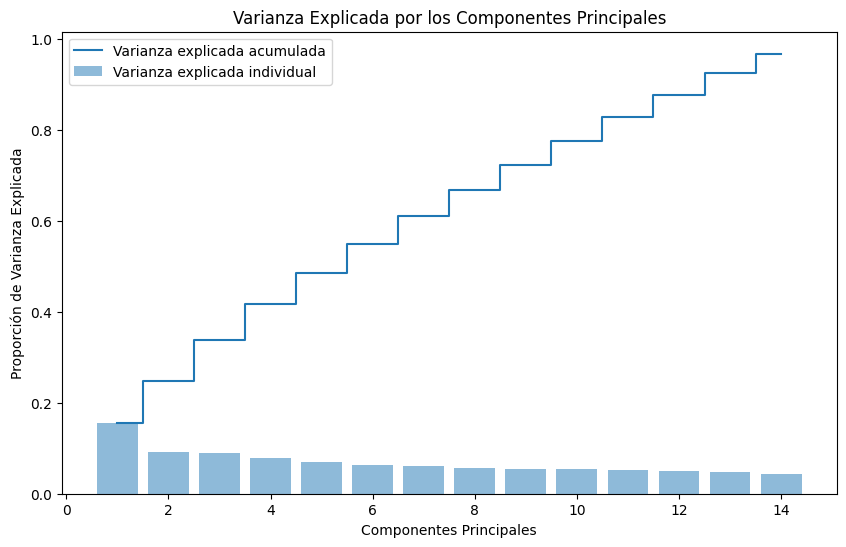

In [ ]:
# Visualización de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(np.cumsum(explained_variance)) + 1), np.cumsum(explained_variance), where='mid', label='Varianza explicada acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.legend(loc='best')
plt.show()

## Análisis de modelos

### Modelo 1: K-Means

### Modelo 2: DBSCAN

### Modelo 3: